# Activation Functions in Neural Networks

## What Is an Activation Function?

An **activation function** is a mathematical formula applied to the output of a neuron (after summing its inputs and adding a bias) in a neural network. In simple terms, it acts like a "switch" or "decision maker" that decides if a neuron should be activated (fire) or not. This non-linear step is essential because it allows the network to learn and model complex patterns. Without it, the network would only be able to perform simple, linear calculations.

## What Happens If We Don't Use an Activation Function?

If no activation function is used, every layer in the network performs only a linear transformation (like a weighted sum). No matter how many layers you stack, the overall effect is still just a single linear function. This means the network would not be able to learn or represent non-linear relationships in data, which are crucial for solving real-world problems like image or speech recognition.

## Common Activation Functions

### 1. Sigmoid (Logistic) Function

**Definition:**  
$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

![Sigmoid Function](sigma.png)


**Advantages:**
- **Smooth Gradients:** Provides a smooth gradient, which helps in gradient-based learning.
- **Probability Output:** Outputs values between 0 and 1, making it useful when you need to interpret the output as a probability.
- **Why Better:** Ideal for output layers when you want probabilities.

**Disadvantages:**
- **Vanishing Gradient:** For very high or low input values, gradients become very small, which slows down learning.
- **Not Zero-Centered:** The output is always positive, potentially leading to inefficient updates.
- **Why Worse:** Less effective in hidden layers compared to functions like tanh or ReLU.

---

### 2. Hyperbolic Tangent (Tanh) Function

**Definition:**  
$$
\tanh(x) = \frac{e^x - e^{-x}}{e^x + e^{-x}}
$$
![Tanh Function](Tanh.gif)


**Advantages:**
- **Zero-Centered Output:** Produces outputs between -1 and 1, which often results in faster convergence during training.
- **Stronger Gradients Around Zero:** Helps in learning for values near zero.
- **Why Better:** Often preferred in hidden layers over sigmoid because it is zero-centered.

**Disadvantages:**
- **Vanishing Gradient:** Like the sigmoid, it suffers from vanishing gradients for very high or very low input values.
- **Why Worse:** Not a complete fix; deep networks can still encounter training issues.

---

### 3. Rectified Linear Unit (ReLU)

**Definition:**  
$$
\text{ReLU}(x) = \max(0, x)
$$
![Relu Function](relu.png)


**Advantages:**
- **Computational Efficiency:** Simple to compute, which speeds up training.
- **Mitigates Vanishing Gradient:** For positive inputs, the gradient does not vanish.
- **Why Better:** Faster convergence compared to sigmoid and tanh in many applications.

**Disadvantages:**
- **Dying ReLU Problem:** Neurons can become inactive if they always output zero (when inputs are negative).
- **Why Worse:** May be less robust than variants like Leaky ReLU that address the dead neuron issue.

---

### 4. Leaky ReLU

**Definition:**  
$$
\text{Leaky ReLU}(x) = 
\begin{cases} 
x, & \text{if } x \geq 0 \\
\alpha x, & \text{if } x < 0
\end{cases}
$$
![Leaky Relu Function](leakyReLU.png)


with a small constant \(\alpha\) (commonly 0.01).

**Advantages:**
- **Prevents Neuron Death:** Allows a small gradient when \(x\) is negative, reducing the risk of neurons “dying.”
- **Why Better:** More robust training than standard ReLU in certain cases.

**Disadvantages:**
- **Hyperparameter Tuning:** The value of \(\alpha\) is arbitrary and may need tuning.
- **Why Worse:** Adds an extra tuning step compared to the simpler ReLU.

---

### 5. Softmax Function

**Definition:**  
$$
\text{softmax}(z_i) = \frac{e^{z_i}}{\sum_{j} e^{z_j}}
$$
Used mainly in output layers for multi-class classification.

![Softmax Function](Softmax.png)

**Advantages:**
- **Probability Distribution:** Converts outputs into probabilities that sum to 1.
- **Why Better:** Perfect for classification tasks where you need a clear probabilistic interpretation.

**Disadvantages:**
- **Sensitive to Outliers:** Can be affected by extreme values in the input.
- **Why Worse:** Not used in hidden layers, as its primary function is for final probability output.

---

## This is enough. For extra knowledge you can read the below activation function.

### 6. Parametric ReLU (PReLU)

**Definition:**  
$$
\text{PReLU}(x) = 
\begin{cases} 
x, & \text{if } x \geq 0 \\
a x, & \text{if } x < 0
\end{cases}
$$
where \(a\) is learned during training.

**Advantages:**
- **Adaptive:** Learns the optimal slope for negative inputs, potentially improving performance.
- **Why Better:** More flexible than fixed functions like ReLU or Leaky ReLU.

**Disadvantages:**
- **Additional Parameters:** Increases the complexity of the model and the risk of overfitting.
- **Why Worse:** Computationally more expensive and requires careful regularization.

---

### 7. Exponential Linear Unit (ELU)

**Definition:**  
$$
\text{ELU}(x) = 
\begin{cases} 
x, & \text{if } x \geq 0 \\
\alpha(e^x - 1), & \text{if } x < 0
\end{cases}
$$

**Advantages:**
- **Negative Outputs:** Produces negative values which help center the activations around zero.
- **Why Better:** Can lead to faster learning and better performance than ReLU in some cases.

**Disadvantages:**
- **Computational Cost:** More complex due to the exponential calculation.
- **Why Worse:** Slower to compute compared to the simplicity of ReLU.

---


# Simple Explanations

1. **Effect of Very High or Low Input Values (z) in Sigmoid and Tanh:**
If you show a graph, you should point out that as the activation function flattens (the curve becomes horizontal) at the extremes, the slope is near zero. This visual illustration reinforces that even if the input changes slightly, the output barely changes, leading to minimal gradient and slow convergence. So, while your answer using the graph is on the right track, make sure to explicitly connect the graph's flat regions with the near-zero gradients and explain that this is why learning is slow in those regions.

   - Consider a neuron where the pre-activation output is computed as:
     $$ z = w \cdot x + b $$
     For simplicity, assume:
     - Input: \( x = 1 \)
     - Bias: \( b = 0 \)
     Thus, \( z = w \).
   - **Initial Condition:**  
     Let the initial weight be \( w = 10 \), so that \( z = 10 \).
   - The sigmoid activation function is defined as:
     $$ \sigma(z) = \frac{1}{1 + e^{-z}} $$
   - For \( z = 10 \):
     $$ \sigma(10) \approx \frac{1}{1 + e^{-10}} \approx 0.99995 $$
   - In these high-value (saturation) regions, even a change in \( z \) produces a very small change in the output, because the derivative of the sigmoid function, 
     $$ \sigma'(z) = \sigma(z)(1-\sigma(z)), $$
     becomes extremely small.

2. **Practical Weight Update Example Using Binary Cross Entropy Loss:**
   - **Setup:**  
     Let’s assume:
     - True label \( y = 1 \) (i.e., we desire an output near 1).
     - Input \( x = 1 \) and bias \( b = 0 \).
     - Initial weight \( w = 10 \), so \( z = 10 \) and predicted output:
       $$ \hat{y} = \sigma(10) \approx 0.99995. $$
   - **Loss Function (Binary Cross Entropy):**  
     The binary cross entropy loss is defined as:
     $$ L = -\Bigl[ y \cdot \ln(\hat{y}) + (1-y) \cdot \ln(1-\hat{y}) \Bigr]. $$
     For \( y = 1 \), the loss simplifies to:
     $$ L = -\ln(\hat{y}) \approx -\ln(0.99995). $$
     Since \( \ln(0.99995) \) is very close to 0, the loss is very small.
   - **Computing the Gradient:**
     1. **Gradient of Loss with Respect to Prediction \(\hat{y}\):**  
        For binary cross entropy:
        $$ \frac{\partial L}{\partial \hat{y}} = -\frac{y}{\hat{y}} + \frac{1-y}{1-\hat{y}}. $$
        With \( y = 1 \):
        $$ \frac{\partial L}{\partial \hat{y}} = -\frac{1}{\hat{y}} \approx -\frac{1}{0.99995} \approx -1. $$
     2. **Gradient of the Sigmoid with Respect to \( z \):**  
        $$ \frac{\partial \hat{y}}{\partial z} = \hat{y}(1-\hat{y}) \approx 0.99995 \times 0.00005 \approx 0.00005. $$
     3. **Chain Rule to Get Gradient with Respect to \( z \):**  
        $$ \frac{\partial L}{\partial z} = \frac{\partial L}{\partial \hat{y}} \cdot \frac{\partial \hat{y}}{\partial z} \approx -1 \times 0.00005 = -0.00005. $$
     4. **Gradient with Respect to Weight \( w \):**  
        Since \( z = w \cdot x \) (with \( x = 1 \)):
        $$ \frac{\partial z}{\partial w} = 1, $$
        so:
        $$ \frac{\partial L}{\partial w} = \frac{\partial L}{\partial z} \cdot \frac{\partial z}{\partial w} \approx -0.00005. $$
   - **Weight Update Using Gradient Descent:**  
     With a learning rate \( \eta = 0.1 \), the weight update rule is:
     $$ w_{\text{new}} = w - \eta \cdot \frac{\partial L}{\partial w}. $$
     Substituting the values:
     $$ w_{\text{new}} = 10 - 0.1 \times (-0.00005) = 10 + 0.000005 = 10.000005. $$
   - **Observation:**  
     Although the weight changed from \( 10 \) to \( 10.000005 \) (a very tiny update), this is due to the saturated region of the sigmoid function where the derivative is extremely small. Such a negligible update slows down learning, as the neuron's output hardly changes even after the weight update.

3. **Zero-Centered Output Explained (e.g., in Tanh):**
   - A function is **zero-centered** if its outputs are symmetrically distributed around zero. For example, the tanh function produces outputs in the range \([-1, 1]\).
   - **Example:**  
     Imagine two neurons:
     - One outputs \( 0.9 \) for a given input.
     - Another outputs \( -0.8 \) for a similar input.
     These outputs balance each other around zero.
   - **Why It Matters:**  
     During backpropagation, zero-centered activations help ensure that weight updates are balanced (i.e., not all adjustments push in one direction). This balanced updating often leads to faster convergence during training.
   - **In simple terms:**  
     Zero-centered outputs mean that the neurons produce both positive and negative values, which helps the network learn in a more balanced and efficient way.

4. **Stronger Gradients Around Zero in Tanh:**
   - The tanh function has its steepest slope (largest gradient) when \( z \) is near 0. This means that small changes in \( z \) cause relatively large changes in the output.
   - **Example:**  
     If a neuron's \( z \) is near 0, a small increase might change the output from \( 0.1 \) to \( 0.2 \), which is a significant change compared to what would occur in saturation regions.
   - **Why It Matters:**  
     When the neuron is in this “sensitive” region (around \( z = 0 \)), even minor weight adjustments lead to noticeable differences in the activation. This strong response helps the network update the weights more effectively and speeds up learning.
   - **In simple terms:**  
     Neurons are most “responsive” when their input \( z \) is near zero, allowing for rapid and effective learning.

5. **ReLU and the Dying ReLU Problem:**
   - The ReLU function is defined as:
     $$ \text{ReLU}(z) = \max(0, z) $$
     It outputs the input \( z \) if \( z \) is positive and 0 otherwise.
   - **Dying ReLU Problem:**  
     If a neuron frequently receives negative inputs, its output will always be 0. When a neuron outputs 0 consistently, its gradient becomes 0, meaning it stops learning because its weights are not updated anymore.
   - **Why It Matters:**  
     A "dead" neuron no longer contributes to the network’s decision-making process, which reduces the overall capacity of the model to learn complex patterns.
   - **In simple terms:**  
     If a neuron becomes “dead” (always outputs 0), it stops reacting to input changes and can no longer help the network learn or make predictions.

**Initialization and Choice Between ReLU and Leaky ReLU:**

When a neuron receives a negative input such that 𝑧 is negative (for example, −0.1), the ReLU activation outputs 0, and the gradient during that forward pass becomes 0. This means that during that specific iteration, no weight update occurs for that neuron because the gradient used for the update is zero. However, this is not necessarily permanent. In subsequent training iterations, if the inputs to that neuron change and cause 𝑧
z to be positive, the activation will be nonzero, a nonzero gradient will be computed, and the weights can then be updated accordingly. So a single occurrence of a negative 𝑧 does not lock the neuron permanently into inactivity—it just doesn't update in that specific pass.

- **Initialization:**
Techniques like He initialization are specifically designed for ReLU activations to help ensure that the initial weights lead to a good spread of z values, minimizing the chance that many neurons will start off in the negative region. This helps reduce the risk of neurons becoming dead from the outset.

- **Why ReLU is Still Popular:**
Although leaky ReLU (and other variants) can mitigate the dying ReLU problem by allowing a small gradient for negative inputs, many practitioners still prefer standard ReLU because it is computationally simpler, promotes sparsity (which can be beneficial for some models), and has been shown to work very well in practice when combined with proper initialization and techniques like batch normalization. The occasional dying neuron issue is often manageable with these methods, so the simplicity and efficiency of ReLU generally outweigh the benefits of using leaky variants in many applications.

**Regarding sparsity:**


"Sparsity" in neural networks refers to the situation where, for a given input, many neurons in a layer output zero (or near zero), meaning that only a small subset of neurons are active. This can be beneficial for several reasons:

1. Efficiency: Sparse activations mean fewer neurons are doing computations for that input, which can reduce the computational cost and memory usage.
2. Robustness and Generalization: Sparse representations can help the network focus on the most relevant features and reduce overfitting, as unnecessary or redundant features are effectively "turned off."
3. Interpretability: When only a few neurons are active, it can be easier to understand and analyze which features are being used for the decision-making process.

In [47]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns

In [4]:
data = pd.read_csv('Raisindata.csv')
data.dropna(inplace=True)

In [5]:
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


In [6]:
data = data.sample(frac=1, random_state=42).reset_index(drop=True)

In [7]:
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,95347,451.526154,280.226153,0.784111,99256,0.674956,1255.245,Kecimen
1,61861,345.943650,235.430468,0.732706,67390,0.702280,1063.621,Besni
2,52693,283.504239,242.113954,0.520265,54860,0.737749,895.745,Kecimen
3,112808,542.504780,267.201878,0.870293,116961,0.743155,1390.400,Besni
4,49882,287.264327,222.185873,0.633852,50880,0.766378,843.764,Kecimen


In [8]:
data['Class'] = data['Class'].map({"Kecimen": 0, "Besni": 1})

In [9]:
data.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,95347,451.526154,280.226153,0.784111,99256,0.674956,1255.245,0
1,61861,345.943650,235.430468,0.732706,67390,0.702280,1063.621,1
2,52693,283.504239,242.113954,0.520265,54860,0.737749,895.745,0
3,112808,542.504780,267.201878,0.870293,116961,0.743155,1390.400,1
4,49882,287.264327,222.185873,0.633852,50880,0.766378,843.764,0


In [11]:
split_index = int(len(data)*.8)
print(split_index)

720


In [12]:
# 2. Split the DataFrame manually using .iloc
train_data = data.iloc[:split_index]
test_data = data.iloc[split_index:]

In [13]:
# 3. Separate features (X) and targets (Y) for both training and test sets.
X_train = train_data.drop(columns='Class').values
y_train = train_data['Class'].values

X_test = test_data.drop(columns='Class').values
y_test = test_data['Class'].values

In [15]:
# 4) Scale features   ## if i wont add feature scaling then it give 0% accrucacy but by adding this now it is giving something
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [16]:
print(X_train_scaled.shape)

(720, 7)


Our NN will have a simple two-layer architecture. Input layer X(A0 for understanding)  will have 7 neuron. A hidden layer (A1)  will have 10 units with ReLU activation and finally our output layer(A2)  will have 1 units with sigmoid activation.

## Forward Propagation
- **X**: (720, 7)
- **W1**: (7,10)                      ### 10 neuron 
- **b1**: (1,10)
- **z1**: (720,10)
- **A1 (relu)**: (720,10)

- **W2**: (10,)
- **b2**: (1,)
- **z2**: (720,)
- **A2 (sigmoid output layer)**: (720,)


## Backpropagation
- **dz2**: (720,)
- **dW2**: (10,)
- **db2**: (1,)

- **dA1**: (720, 10)
- **dz1**: (720, 10)
- **dW1**: (7, 10)
- **db1**: : (1, 10)

The constant accuracy is due to the way you initialize your network’s weights. In your implementation, the weights for both the hidden layer (self.w1) and the output layer (self.w2) are initialized to zeros. This leads to the following issues:

Symmetry in the Hidden Layer:
Initializing weights to zero makes all neurons in the hidden layer identical. As a result, they all compute the same output (in this case, zero after applying ReLU), and the gradients with respect to these weights become ineffective. This is often referred to as the "symmetry problem" in neural networks.

No Effective Learning:
Since the hidden layer outputs are all zeros, the output layer receives no meaningful signal from the input features. The network ends up always computing a constant value (0.5 after applying the sigmoid to zero plus the bias), and only the bias of the output layer (b2) gets updated. This single parameter update is insufficient to capture the complexity of the data, hence the loss (binary cross entropy ≈ 0.6931) and the accuracy do not change during training.

In [34]:
class shallowNN:
    def __init__(self) -> None:
        self.w1 : np.ndarray = None
        self.b1 : np.ndarray = None

        self.w2 : np.ndarray = None
        self.b2 : float = 0.0
    
    #Sigmoid method
    def _sigmoid(self, z) -> float:
        return 1 / (1 + np.exp(-z))
    
    def _relu(self, z) -> float:
        return np.maximum(0, z)

    def hypothesisFunctionHiddenLayer(self, X: np.ndarray) -> np.ndarray:
        """Predicts output using learned weights."""
        m, n_features = X.shape
        if self.w1 is None:
            # He initialization for ReLU activation
            self.w1 = np.random.randn(n_features, 10) * np.sqrt(2.0 / n_features)
        if self.b1 is None:
            self.b1 = np.zeros((1, 10))

        z1 = np.dot(X, self.w1) + self.b1
        A1 = self._relu(z1)
        return A1
    
    def hypothesisFunction(self, A1: np.ndarray) -> np.ndarray:
        """Predicts output using learned weights."""
        if self.w2 is None:
            # Xavier initialization for sigmoid activation
            self.w2 = np.random.randn(A1.shape[1]) * np.sqrt(1.0 / 10)

        z2 = np.dot(A1, self.w2) + self.b2
        A2 = self._sigmoid(z2)
        return A2
    
    def compute_loss(self, y_true: np.ndarray, y_pred: np.ndarray)-> float:
        # binary cross entropy
        epsilon = 1e-9
        y1 = y_true * np.log(y_pred + epsilon)
        y2 = (1-y_true) * np.log(1 - y_pred + epsilon)
        return -np.mean(y1 + y2)
    
    def train(
        self,
        X: np.ndarray,
        y_true: np.ndarray,
        learning_rate: float = 0.0001,
        epochs: int = 50
    ) -> tuple[list[float], list[float]]:
    

        m = len(y_true)
        bce_history: list[float] = []
        acc_history: list[float] = []

        for epoch in range(epochs):
            # Forward pass
            A1 = self.hypothesisFunctionHiddenLayer(X)
            A2 = self.hypothesisFunction(A1)
            binaryCrossEntropy = self.compute_loss(y_true, A2)

            # Calculate accuracy (%)
            y_pred_cls = [1 if i > 0.5 else 0 for i in A2]
            accuracy = np.mean(y_pred_cls == y_true) * 100

            # Print progress
            print(f"Epoch {epoch+1}/{epochs} | Binary Cross Entropy: {binaryCrossEntropy:.4f} | Accuracy: {accuracy:.2f}")

            # Backward pass
            dz2 = A2 - y_true                              # (m,)
            dw2 = np.dot(A1.T, dz2) / m                      # (10,)
            db2 = np.sum(dz2) / m                            # Scalar
            
            dA1 = dz2.reshape(-1, 1) * self.w2.reshape(1, -1)  # (m,10)
            dz1 = dA1 * (A1 > 0)                             # (m,10)
            dw1 = np.dot(X.T, dz1) / m                       # (n_features,10)
            db1 = np.sum(dz1, axis=0, keepdims=True) / m     # (1,10)
            

            # Update parameters
            self.w1 -= learning_rate * dw1
            self.b1 -= learning_rate * db1
            self.w2 -= learning_rate * dw2
            self.b2 -= learning_rate * db2

            # Store logs
            bce_history.append(binaryCrossEntropy)
            acc_history.append(accuracy)

        return bce_history, acc_history
            

    def predict(self, X: np.array) -> np.array:
        """
        Predicts class labels for input data X.
        
        :param X: Input features of shape (m, n_features).
        :return: Predicted class labels (0 or 1) of shape (m,).
        """
        A1 = self.hypothesisFunctionHiddenLayer(X)
        A2 = self.hypothesisFunction(A1)
        threshold = 0.5
        y_predicted_cls = [1 if i > threshold else 0 for i in A2]
        return np.array(y_predicted_cls)


In [36]:
# 5) Create and train the model
model = shallowNN()
bce_history, acc_history = model.train(
    X=X_train_scaled,
    y_true=y_train,
    learning_rate=0.1,
    epochs=100
)

Epoch 1/100 | Binary Cross Entropy: 1.3567 | Accuracy: 20.42
Epoch 2/100 | Binary Cross Entropy: 1.1769 | Accuracy: 22.78
Epoch 3/100 | Binary Cross Entropy: 1.0368 | Accuracy: 25.28
Epoch 4/100 | Binary Cross Entropy: 0.9299 | Accuracy: 37.08
Epoch 5/100 | Binary Cross Entropy: 0.8479 | Accuracy: 41.94
Epoch 6/100 | Binary Cross Entropy: 0.7846 | Accuracy: 46.39
Epoch 7/100 | Binary Cross Entropy: 0.7346 | Accuracy: 50.83
Epoch 8/100 | Binary Cross Entropy: 0.6943 | Accuracy: 54.17
Epoch 9/100 | Binary Cross Entropy: 0.6613 | Accuracy: 57.36
Epoch 10/100 | Binary Cross Entropy: 0.6335 | Accuracy: 60.14
Epoch 11/100 | Binary Cross Entropy: 0.6097 | Accuracy: 64.44
Epoch 12/100 | Binary Cross Entropy: 0.5894 | Accuracy: 66.67
Epoch 13/100 | Binary Cross Entropy: 0.5719 | Accuracy: 69.72
Epoch 14/100 | Binary Cross Entropy: 0.5566 | Accuracy: 74.03
Epoch 15/100 | Binary Cross Entropy: 0.5428 | Accuracy: 75.56
Epoch 16/100 | Binary Cross Entropy: 0.5305 | Accuracy: 77.36
Epoch 17/100 | Bi

In [ ]:
# 6) Print Final Training Metrics
print(f"Final Training Loss (Binary Cross Entropy): {bce_history[-1]:.4f}")
print(f"Final Training acc_history: {acc_history[-1]:.4f}")

Final Training Loss (Binary Cross Entropy): 0.3479
Final Training acc_history: 85.9722


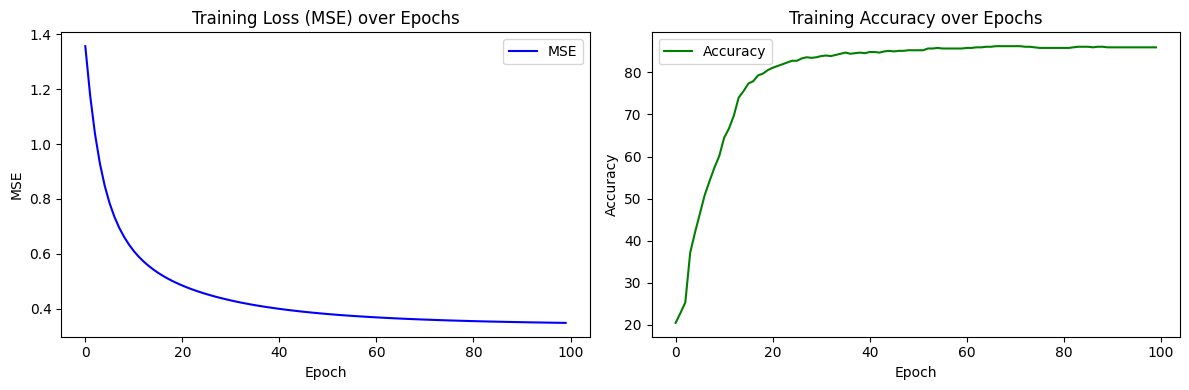

In [ ]:
# 7) Plot MSE and Accuracy over epochs
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

axes[0].plot(bce_history, label='MSE', color='blue')
axes[0].set_title('Training Loss (MSE) over Epochs')
axes[0].set_xlabel('Epoch')
axes[0].set_ylabel('MSE')
axes[0].legend()

axes[1].plot(acc_history, label='Accuracy', color='green')
axes[1].set_title('Training Accuracy over Epochs')
axes[1].set_xlabel('Epoch')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()
plt.show()

In [41]:
predictions = model.predict(X_test_scaled)

In [45]:
# Print test accuracy
test_accuracy: float = accuracy_score(y_test, predictions) * 100
print(f"Test Accuracy: {test_accuracy:.2f}%")

Test Accuracy: 87.22%


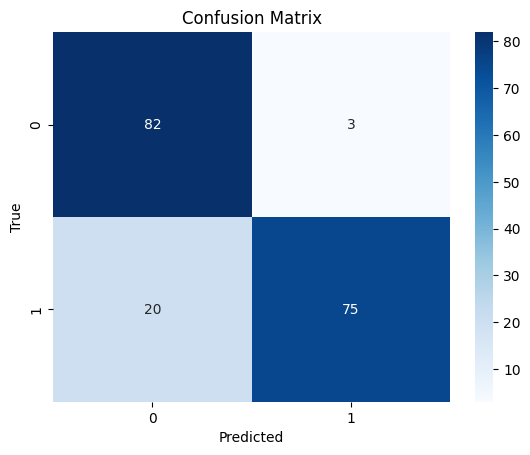

In [48]:
# Display confusion matrix
cm: np.ndarray = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()